# Intensive Module in Machine Learning
# Problem set 4: Unsupervised Learning

If you are looking at the pdf/html version of this document, start by running the command `jupyter notebook` to launch an interactive notebook and then navigate to the correct folder and open this file `problem-set-4.ipynb`. Import your default packages for manipulating data and plotting:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## 1. Principle component analysis

## 1.1 Toy example

We generate some simple two-dimensional data with a defined correlation structure:

In [2]:
x = np.random.normal(size=20)
y = np.random.normal(size=20)
y += 2*x

a) Standardise the data and then perform a principle compontent analysis of the data.

In [36]:
from sklearn.decomposition import PCA

X = np.concatenate(([x],[y]),axis=0)

#Let's recycle the standardise function we have written for problem sheet 1
def standardise(X):
    standardised_data = X.copy()
    for ii in range(0,np.shape(X)[1]):
        mean = X[:,ii].mean()
        std = X[:,ii].std()
        standardised_data[:,ii] = (X[:,ii] - mean) / std
    return standardised_data

X_standard = standardise(np.transpose(X))

pca = PCA(n_components=2)
pca.fit(X_standard)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

b) Plot the data points in the original (x,y) plane and then add the axis of the principle components to the plot.

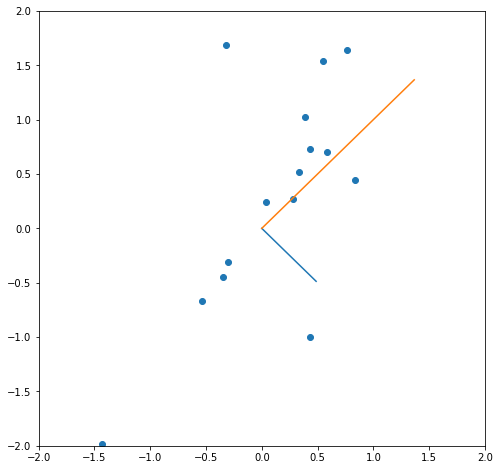

In [71]:
def draw_2D_principle_components(value, vector):
    slope = vector[1]/vector[0]
    x_points = np.arange(0.0,np.sqrt(value),0.001)
    y_points = x_points * slope
    return x_points, y_points

# plot data
fig = plt.figure(figsize=(8,8))
plt.scatter(x,y)
x1,y1 = draw_2D_principle_components(pca.explained_variance_[1], pca.components_[1])
x2,y2 = draw_2D_principle_components(pca.explained_variance_[0], pca.components_[0])
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


## 1.2 PCA on the NCI60 data 

The NCI60 cancer cell line microarray data. It has n = 64 observations and p = 6830 predictors. 

a) Load and inspect the data.

In [73]:
data = pd.read_csv('nci.data.csv', sep=",", index_col = 0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


b) Standardise the data and then perform a principle compontent analysis it.

In [89]:
#Use the sklearn preprocessing function this time as it works on dataframes (unlike our self-written function)
from sklearn import preprocessing
normalised_features = preprocessing.scale(data.iloc[:, range(0,6830)])

In [80]:
pca2 = PCA()
pca2.fit(normalised_features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

c) Provide a plot of the proportion of variance explained (PVE).

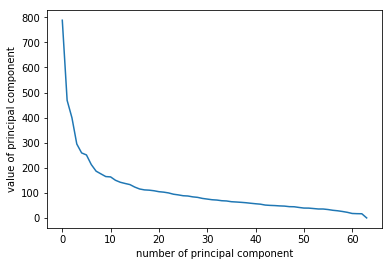

In [83]:
plt.plot(pca2.explained_variance_)
plt.xlabel('number of principal component')
plt.ylabel('value of principal component')
plt.show()

c) The data is 6830 dimensional. Plot is data in the two-dimensional subspace, spaned by the first two principle components.

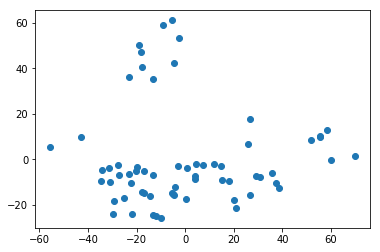

In [91]:
pca3 = PCA(n_components =2)
pca3.fit(normalised_features)

X_transformed = pca3.transform(normalised_features)
plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.show()

## 1.3 Principal component regression and classification

This is an optional exercise. Return to the [Arcene data set](http://archive.ics.uci.edu/ml/datasets/Arcene) from from the previous problem set.

a) Perform a PCA on the predictors of the Arcene data set. Plot the PVE to obtain a reduced number of principal components.

In [92]:
#Let's load the data
train_data = pd.read_csv('./Arcene-data/arcene_train.data.txt', sep=" ", header= None)
train_data = train_data.iloc[:, :-1]
train_labels = np.squeeze(pd.read_csv('./Arcene-data/arcene_train.labels.txt', sep=" ", header= None))

validation_data = pd.read_csv('./Arcene-data/arcene_valid.data.txt', sep=" ", header= None)
validation_data = validation_data.iloc[:, :-1]
validation_labels = np.squeeze(pd.read_csv('./Arcene-data/arcene_valid.labels.txt', sep=" ", header= None))

test_data = pd.read_csv('./Arcene-data/arcene_test.data.txt', sep=" ", header= None)
test_data = test_data.iloc[:, :-1]

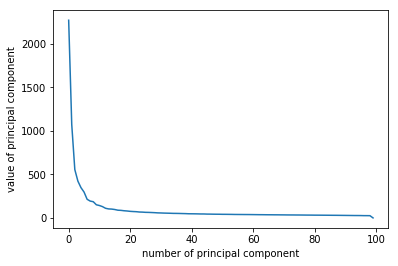

In [94]:
#Let's do PCA and plot PVE
normalised_features = preprocessing.scale(train_data.iloc[:, :10000])

pca4 = PCA()
pca4.fit(normalised_features)
plt.plot(pca4.explained_variance_)
plt.xlabel('number of principal component')
plt.ylabel('value of principal component')
plt.show()

<span style="color:blue"> It looks like $20$ principal components would be enough so we will use transform the data to a $20$ dimensional latent space using PCA </span>

b) Perform a logistic regression on the Arcene data set, but now on the reduced set of principal components.

In [108]:
from sklearn.linear_model import LogisticRegression

normalised_test_features = preprocessing.scale(validation_data.iloc[:, :10000])

pca5 = PCA(n_components = 20)
pca5.fit(normalised_features)

X_transform = pca5.transform(normalised_features)
X_test_transform = pca5.transform(normalised_test_features)

model = LogisticRegression().fit(X_transform, train_labels)

#Let's look at the (training) accuracy of our model
print(model.score(X_transform, train_labels))
#Let's look at the (test/validation) accuracy of our model
print(model.score(X_test_transform, validation_labels))

0.9
0.7


<span style="color:blue">  Train accuracy looks decent, but test accuracy is actually much lower than before applying PCA. </span>

# 2. Clustering

## 2.1 K-means clustering on the NCI60 data

Let's return to the NCI60 data.

a) Perform a K-means clustering with K = 4 clusters. Plot the data on the two-dimensional representation given by the first two principal components showing each cluster as a different colour

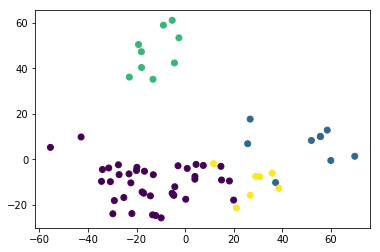

In [111]:
from sklearn.cluster import KMeans

normalised_features = preprocessing.scale(data.iloc[:, range(0,6830)])
kmeans = KMeans(n_clusters=4, random_state=0).fit(normalised_features)

cluster_predict = kmeans.fit_predict(normalised_features)

X_transformed = pca3.transform(normalised_features)
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=cluster_predict)
plt.show()

b) In fact, the data comes from a supervised problem, where the points in the cancer cell line microarray data correspond to different types of cancer. Get the labels of the data and compare it to the cluster number.

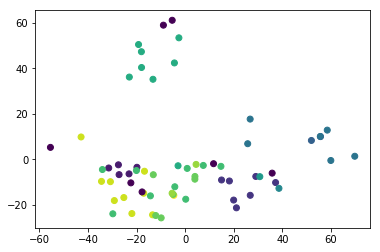

In [126]:
#First load the labels
labels = np.squeeze(pd.read_csv('nci.labels.csv', sep=",", index_col = 0))
#Then translate labels to numerical (integer) values using the LabelEncoder() function
le = preprocessing.LabelEncoder()
le.fit(["CNS","RENAL","BREAST","NSCLC","OVARIAN", "PROSTATE", "MELANOMA","MCF7A-repro", "MCF7D-repro","K562B-repro","K562A-repro","MCF7D-repro","COLON","LEUKEMIA","UNKNOWN"])
#Finally plot data with true labels as color coding 
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=le.transform(labels))
plt.show()

<span style="color:blue"> Some of the clusters that we have trained are clearly recognizable in the true labels, others can be split further into subclasses (15 true labels vs. 4 clusters) </span>

## 2.2 Hierarchical clustering

a) Do a hierarchical clustering on the NCI60 cancer cell line microarray data. Plot the dendrogram.

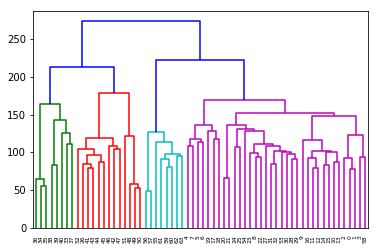

In [141]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(normalised_features, 'ward')
plt.figure()
dn = hierarchy.dendrogram(Z)

b) Cut the dendrogram such that you have K = 6 clusters. Colour each cluster and plot the data in the two-dimensional representation obtained from the PCA earlier.

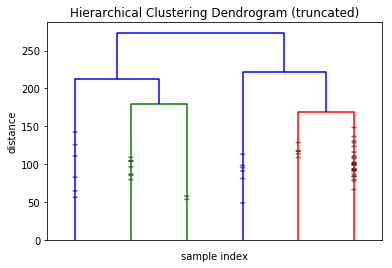

In [142]:
from scipy.cluster.hierarchy import dendrogram

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=6,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

[6 6 6 6 5 5 5 5 6 6 6 6 6 6 6 6 6 5 5 5 6 6 6 6 6 6 2 6 6 6 6 6 6 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 2 6 6 4 4 4 6 4 4 4 4 4]


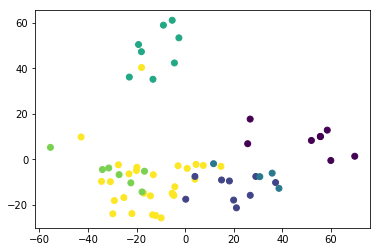

In [143]:
from scipy.cluster.hierarchy import fcluster
k=6
clusters = fcluster(Z, k, criterion='maxclust')

print(clusters)


plt.scatter(X_transformed[:,0],X_transformed[:,1],c=clusters)
plt.show()